In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (536641, 8)

Data Types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing Values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [3]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641,536641,536641,536641.000000,536641,536641.000000,536641.000000,536641
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2301,3811,NaN,1114,NaN,NaN,490300
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15246.898157,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1483.931554,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14367.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15145.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16241.000000,NaN


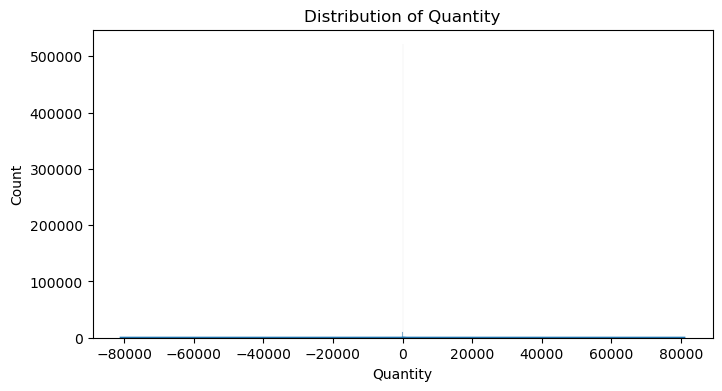

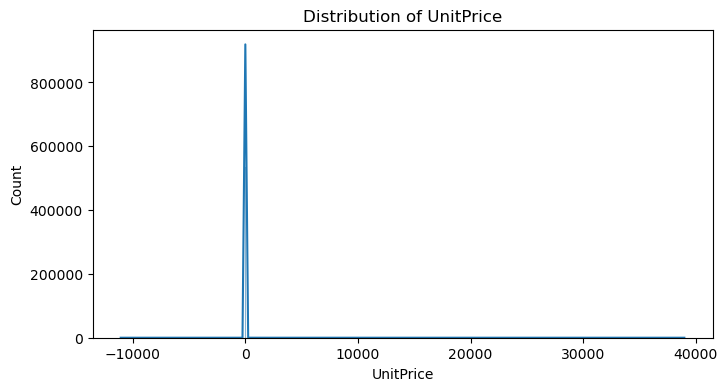

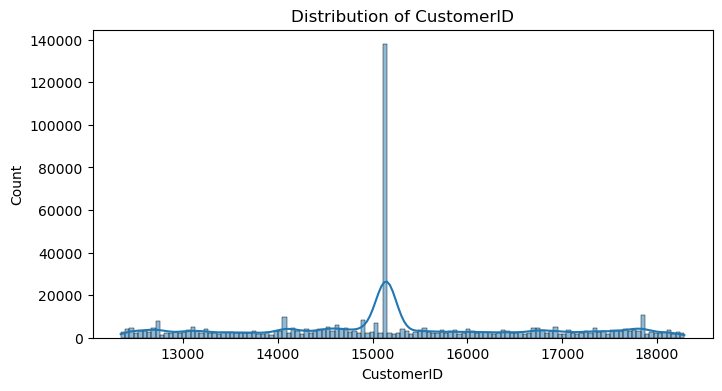

In [4]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

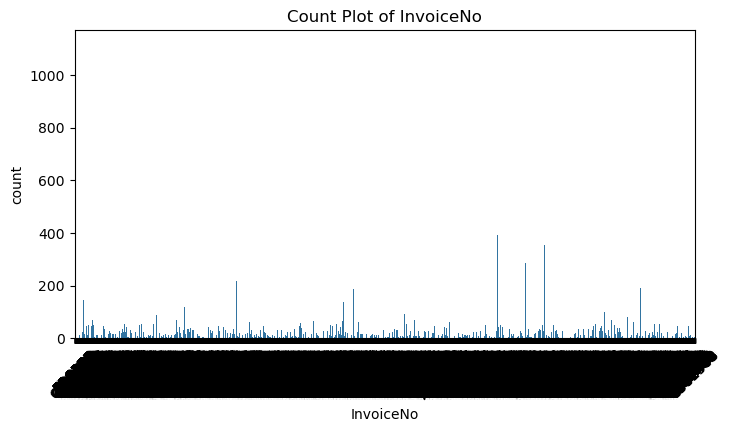

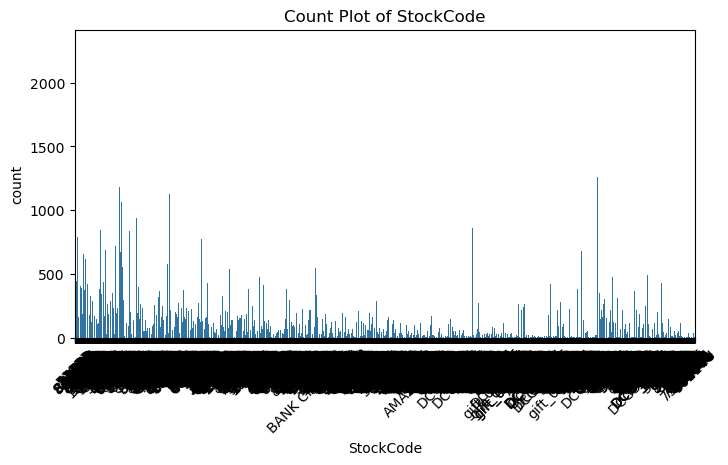

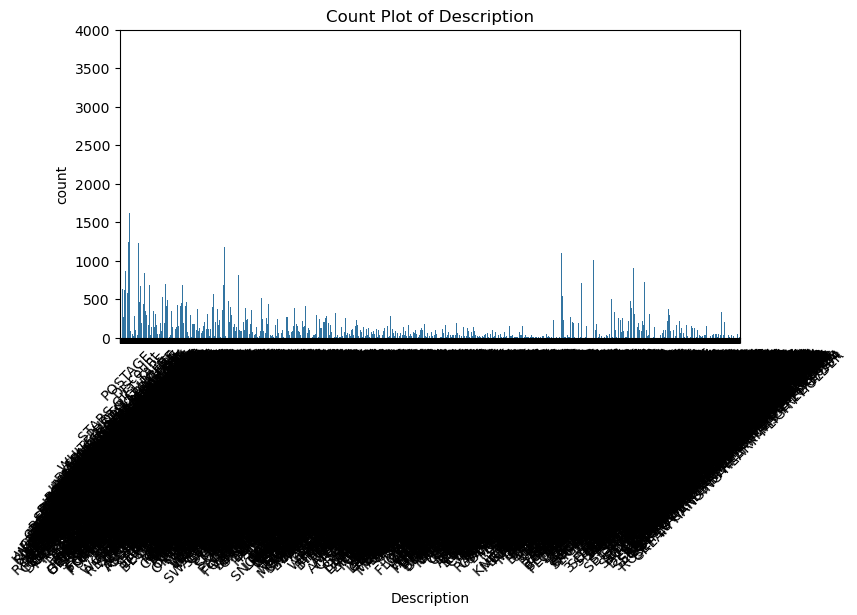

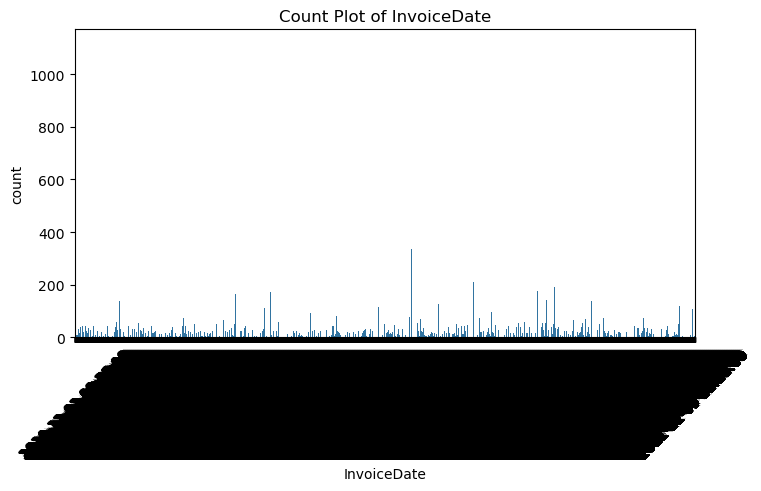

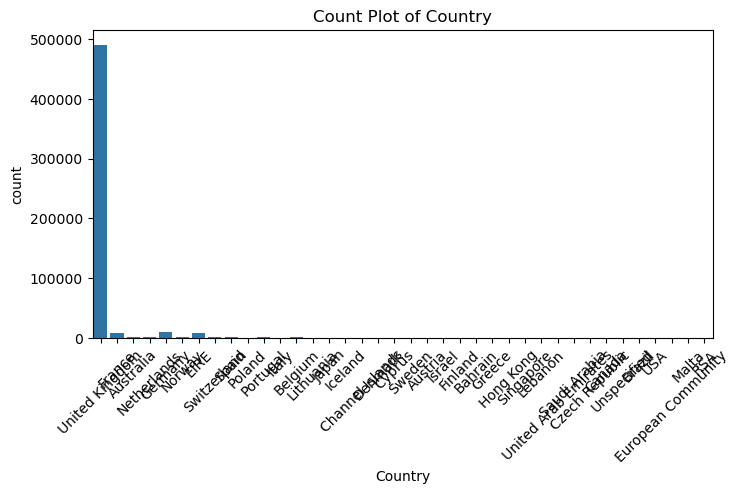

In [5]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

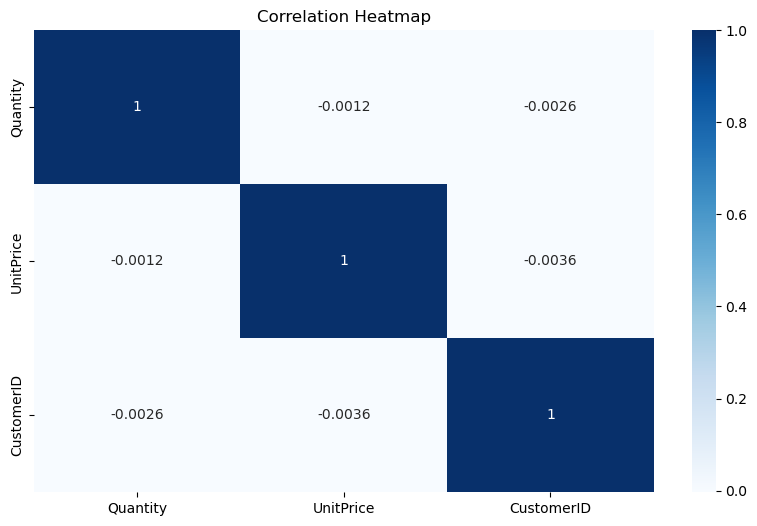

In [7]:
numeric_df = df.select_dtypes(include=['number'])

if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric columns to generate a correlation heatmap.")

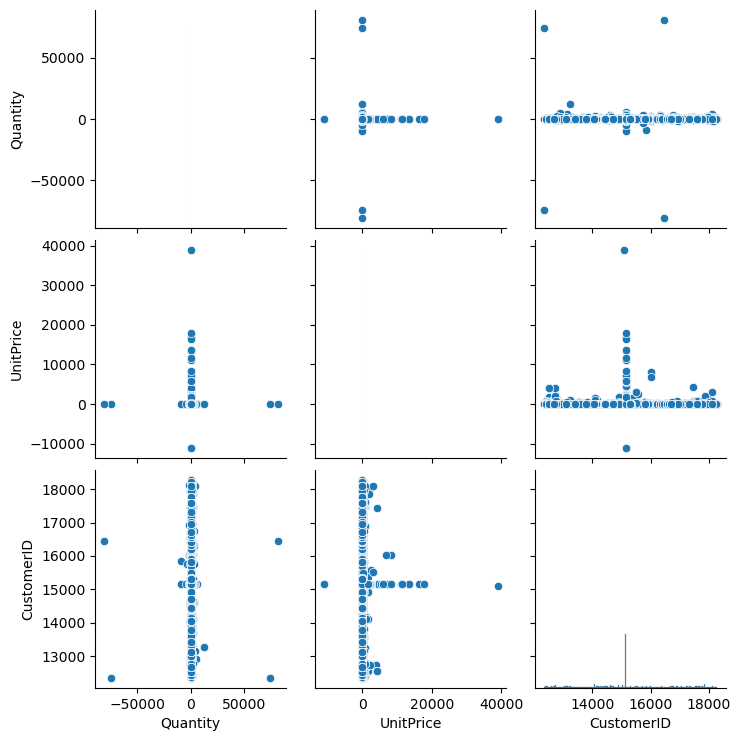

In [8]:
selected_cols = num_cols[:3]  
sns.pairplot(df[selected_cols])
plt.show()

In [10]:
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("dataset", conn, index=False, if_exists="replace")

536641

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [16]:
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("dataset", conn, index=False, if_exists="replace")

536641

In [17]:
query = """
SELECT Description, SUM(Revenue) AS total_revenue
FROM dataset
GROUP BY Description
ORDER BY total_revenue DESC
LIMIT 5;
"""
pd.read_sql_query(query, conn)

,Description,total_revenue
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164459.49
2,WHITE HANGING HEART T-LIGHT HOLDER,99612.42
3,PARTY BUNTING,98243.88
4,JUMBO BAG RED RETROSPOT,92175.79


In [18]:
query = """
SELECT StockCode, SUM(Revenue) AS total_revenue
FROM dataset
GROUP BY StockCode
ORDER BY total_revenue DESC
LIMIT 5;
"""
pd.read_sql_query(query, conn)

,StockCode,total_revenue
0,DOT,206245.48
1,22423,164459.49
2,47566,98243.88
3,85123A,97838.45
4,85099B,92175.79


In [19]:
query = """
SELECT SUBSTR(InvoiceDate, 1, 7) AS month, 
       SUM(Revenue) AS monthly_revenue
FROM dataset
GROUP BY month
ORDER BY month;
"""
pd.read_sql_query(query, conn)

,month,monthly_revenue
0,2010-12,746723.610
1,2011-01,558448.560
2,2011-02,497026.410
3,2011-03,682013.980
4,2011-04,492367.841
5,2011-05,722094.100
6,2011-06,689977.230
7,2011-07,680156.991
8,2011-08,681386.460
9,2011-09,1017596.682


In [20]:
query = """
SELECT CustomerID, SUM(Revenue) AS total_spent
FROM dataset
GROUP BY CustomerID
ORDER BY total_spent DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)

,CustomerID,total_spent
0,15145.0,1448682.26
1,14646.0,279489.02
2,18102.0,256438.49
3,17450.0,187322.17
4,14911.0,132458.73
5,12415.0,123725.45
6,14156.0,113214.59
7,17511.0,88125.38
8,16684.0,65892.08
9,13694.0,62690.54


In [21]:
query = """
SELECT Country, SUM(Revenue) AS total_revenue
FROM dataset
GROUP BY Country
ORDER BY total_revenue DESC;
"""
pd.read_sql_query(query, conn)

,Country,total_revenue
0,United Kingdom,8167128.184
1,Netherlands,284661.540
2,EIRE,262993.380
3,Germany,221509.470
4,France,197317.110
5,Australia,137009.770
6,Switzerland,56363.050
7,Spain,54756.030
8,Belgium,40910.960
9,Sweden,36585.410


In [2]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [4]:
df.to_csv("eda_processed_data.csv", index=False)
print("EDA export complete.")

EDA export complete.
